<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu11/2241720045_TirtaNBP_Praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# No Absen: 27

# Praktikum 1 Klasifikasi 🐱 dan 🐶

## Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data
### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Minggu11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8020 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Minggu11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN
### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/251 ━━━━━━━━━━━━━━━━━━━━ 9:09 4s/step - accuracy: 0.5177 - loss: 0.6929

KeyboardInterrupt: 

## Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

# Praktikum 2 Klasifikasi Multi-label dengan Data CIFAT

## Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


## Langkah 3 - Verifikasi Data

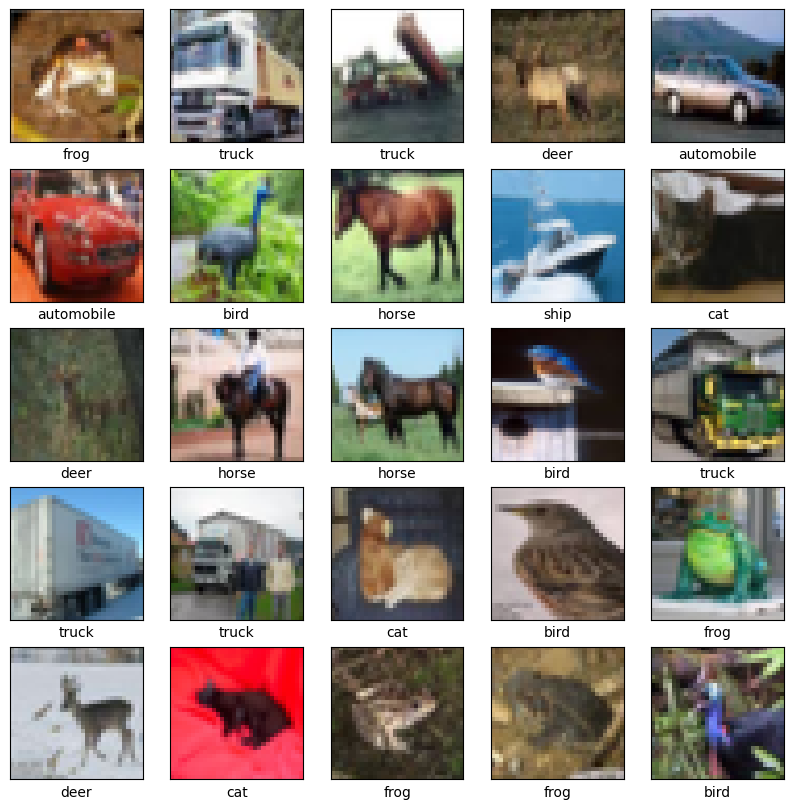

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN
### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

## Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3455 - loss: 1.7670 - val_accuracy: 0.5497 - val_loss: 1.2695
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5586 - loss: 1.2342 - val_accuracy: 0.6065 - val_loss: 1.0943
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.6279 - loss: 1.0539 - val_accuracy: 0.6278 - val_loss: 1.0526
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.6685 - loss: 0.9471 - val_accuracy: 0.6459 - val_loss: 1.0090
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.6919 - loss: 0.8766 - val_accuracy: 0.6800 - val_loss: 0.9200
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 50ms/step - accuracy: 0.7123 - loss: 0.8198 - val_accuracy: 0.6791 - val_loss: 0.9275
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.7400 - loss: 0.7515 - val_accuracy: 0.6999 - val_loss: 0.8739
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7570 

## Langkah 6 - Evaluasi Model

313/313 - 5s - 16ms/step - accuracy: 0.6969 - loss: 0.9097


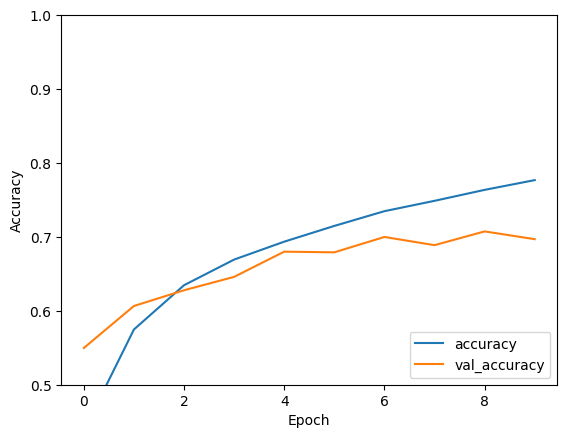

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.6969000101089478


- Berapa akurasi yang Anda dapatkan?
- Jawab: Akurasi yang saya dapatkan sebesar 0.6969000101089478 atau dalam persentase sekitar 69.69%

# Tugas
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.



In [8]:
# Langkah 1 - Import Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
# Langkah 2 - Unduh Dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

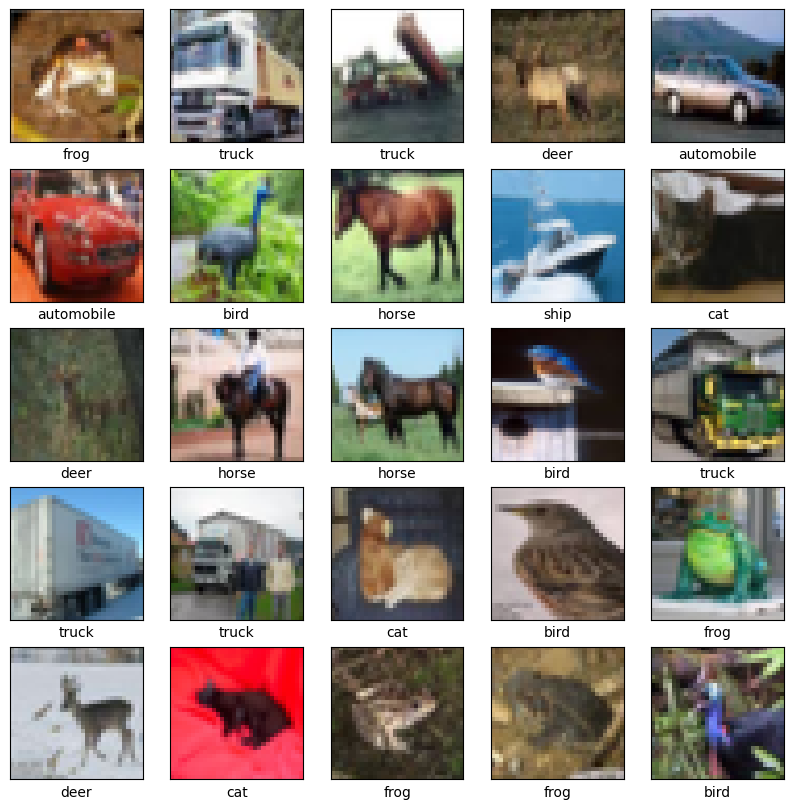

In [10]:
# Langkah 3 - Verifikasi Data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
# Langkah 4 - Buat Model CNN
model = models.Sequential()

# Convolution Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))

# Convolution Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))

# Convolution Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3) , padding='same'))
model.add(layers.BatchNormalization())
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout Layer
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
# Full Connected Layer
model.add(layers.Dense(128, activation='relu'))
# Dropout Layer
model.add(layers.Dropout(0.25))
# Output Layer
model.add(layers.Dense(10, activation='softmax'))

# Langkah 4.5 - Compile Model CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# Langkah 5 - Fit Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.3639 - loss: 1.8015 - val_accuracy: 0.5964 - val_loss: 1.1517
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6067 - loss: 1.1185 - val_accuracy: 0.6703 - val_loss: 0.9393
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6753 - loss: 0.9314 - val_accuracy: 0.6871 - val_loss: 0.9164
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7229 - loss: 0.8040 - val_accuracy: 0.6990 - val_loss: 0.9504
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7532 - loss: 0.7167 - val_accuracy: 0.7399 - val_loss: 0.7898
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7756 - loss: 0.6542 - val_accuracy: 0.7689 - val_loss: 0.7002
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7931 - loss: 0.6056 - val_accuracy: 0.8082 - val_loss: 0.5814
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8084 - loss: 0.5613 - val_a

313/313 - 1s - 3ms/step - accuracy: 0.8165 - loss: 0.5673


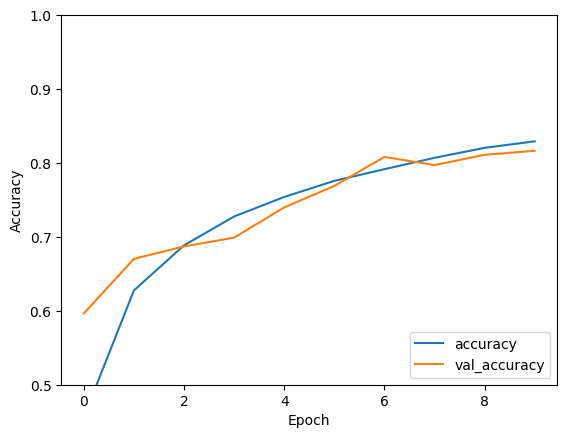

In [13]:
# Langkah 6 - Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
# Langkah 7 - Cetak Hasil Akurasi
print(test_acc)

0.8165000081062317


- Buatlah model CNN untuk klasifikasi dataset MNIST.